# Homework 9 - JODI Data and Seasonality of Turkey's consumption

This week we will download Turkey's natural gas consumption and try to analyse monthly consumption patterns 

However, JODI data is not limited to Turkey, there are also bunch of other countries that you can find data about

Data comes in a hefty zip format, Python code downloads and unzips it. Then extracts data from the inflated CSV file.

Our steps are as follows

* Download JODI data and copy it to **df**
* Filter the data with **REF_AREA** code, **UNIT_MEASURE** and **FLOW_BREAKDOWN** for demanded **OBS_VALUE**
* Create two sets of data 
  * One for demand TOTDEMO
  * One for the IMPLNG
* Plot both data with x axis as TIME_PERIOD. Hint: **plot(x,y)**
* Plot TOTDEMO-IMPLNG to find pipeline imports
* Then use seasonal decomposition from Week 6 to decompose data into seasonal and trend patterns



In [2]:
#1. Download jodi data and copy it to df
%pylab inline
import pandas as pd
import requests 
import zipfile

# jodi db
url='https://www.jodidata.org/_resources/files/downloads/gas-data/GAS_world_NewFormat.zip'

def download_url(url, save_path, chunk_size=128):
    r = requests.get(url, stream=True)
    with open(save_path, 'wb') as fd:
        for chunk in r.iter_content(chunk_size=chunk_size):
            fd.write(chunk)

download_url(url,"./eeps520.zip")

zf = zipfile.ZipFile("eeps520.zip") 
df = pd.read_csv(zf.open('world_NewFormat.csv'))

Populating the interactive namespace from numpy and matplotlib


In [3]:
df.head(2)

,REF_AREA,TIME_PERIOD,ENERGY_PRODUCT,FLOW_BREAKDOWN,UNIT_MEASURE,OBS_VALUE,ASSESSMENT_CODE
0,AE,2009-01,NATGAS,CLOSTLV,M3,NaN,3
1,AE,2009-01,NATGAS,CLOSTLV,TJ,NaN,3


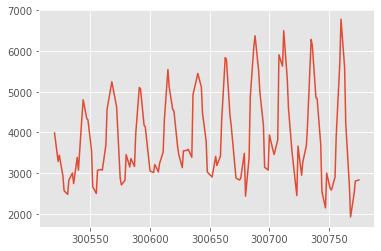

In [32]:
# 2. Filter the data
plot(df[(df.REF_AREA=='TR') & (df.UNIT_MEASURE=='M3') & (df.FLOW_BREAKDOWN=="TOTDEMO")].OBS_VALUE)

In [4]:
# what keywords mean
# https://www.jodidata.org/_resources/files/downloads/gas-data/jodi-gas-wdb-short--long-names-ver2018.pdf
df=df.dropna()

In [5]:
# country codes
# https://www.iso.org/obp/ui/#search/code/
df.REF_AREA.unique() 

array(['AE', 'AL', 'AM', 'AO', 'AR', 'AT', 'AU', 'AZ', 'BB', 'BD', 'BE',
       'BG', 'BH', 'BN', 'BO', 'BR', 'BY', 'BZ', 'CA', 'CH', 'CL', 'CN',
       'CO', 'CZ', 'DE', 'DK', 'DO', 'DZ', 'EC', 'EE', 'EG', 'ES', 'FI',
       'FR', 'GA', 'GB', 'GE', 'GQ', 'GR', 'HK', 'HR', 'HU', 'ID', 'IE',
       'IN', 'IQ', 'IR', 'IT', 'JP', 'KR', 'KW', 'KZ', 'LT', 'LU', 'LV',
       'LY', 'MA', 'MD', 'MK', 'MM', 'MT', 'MX', 'MY', 'NG', 'NL', 'NO',
       'NZ', 'OM', 'PE', 'PG', 'PH', 'PL', 'PT', 'QA', 'RO', 'RU', 'SE',
       'SG', 'SI', 'SK', 'TH', 'TN', 'TR', 'TT', 'TW', 'UA', 'US', 'UY',
       'VE', 'VN', 'ZA'], dtype=object)

In [6]:
# https://www.jodidata.org/_resources/files/downloads/gas-data/jodi-gas-wdb-short--long-names-ver2018.pdf

# let's filter demand data with TOTDEMO
# and LNG import data with IMPLNG

tur_data_demand=df[(df.REF_AREA=='TR') & (df.UNIT_MEASURE=='M3') & (df.FLOW_BREAKDOWN=="TOTDEMO")]
tur_data_LNG=df[(df.REF_AREA=='TR') & (df.UNIT_MEASURE=='M3') & (df.FLOW_BREAKDOWN=="IMPLNG")]

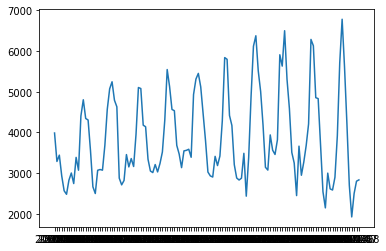

In [7]:
plot(tur_data_demand.TIME_PERIOD,tur_data_demand.OBS_VALUE)

In [8]:
tur_data_LNG

,REF_AREA,TIME_PERIOD,ENERGY_PRODUCT,FLOW_BREAKDOWN,UNIT_MEASURE,OBS_VALUE,ASSESSMENT_CODE
298560,TR,2010-01,NATGAS,IMPLNG,M3,904.0,1
298563,TR,2010-02,NATGAS,IMPLNG,M3,744.0,1
298564,TR,2010-03,NATGAS,IMPLNG,M3,902.0,1
298567,TR,2010-04,NATGAS,IMPLNG,M3,573.0,1
298568,TR,2010-05,NATGAS,IMPLNG,M3,583.0,1
...,...,...,...,...,...,...,...
298807,TR,2020-04,NATGAS,IMPLNG,M3,1114.0,1
298808,TR,2020-05,NATGAS,IMPLNG,M3,1446.0,1
298811,TR,2020-06,NATGAS,IMPLNG,M3,917.0,1
298812,TR,2020-07,NATGAS,IMPLNG,M3,508.0,1


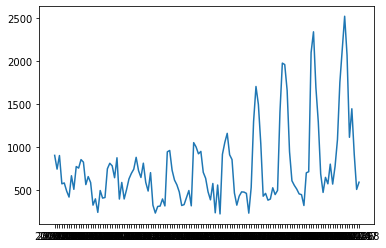

In [9]:
plot(tur_data_LNG.TIME_PERIOD,tur_data_LNG.OBS_VALUE)

Text(0.5, 1.0, "Turkey's Monthly Natural Gas Consumption")

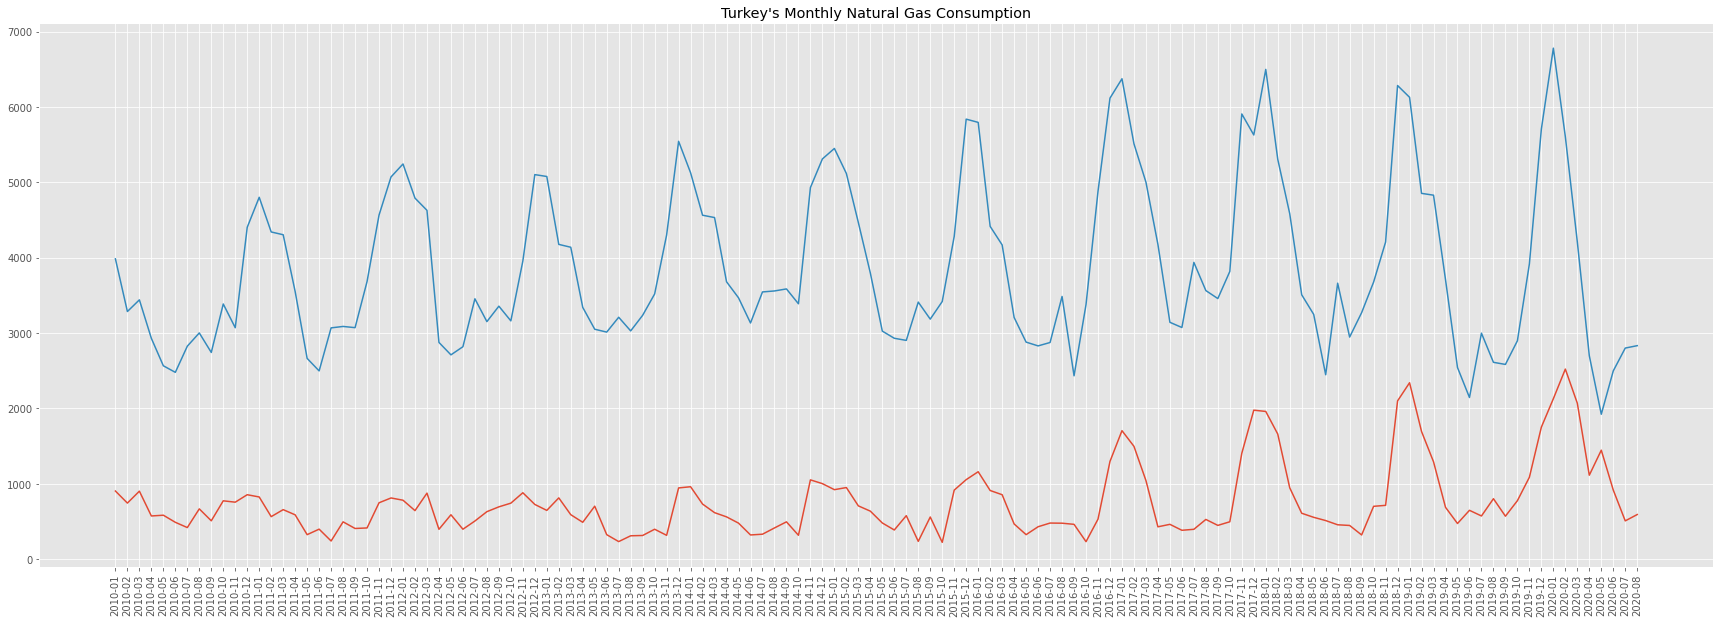

In [10]:
# using styling and sizing we can create a better plot

plt.style.use('ggplot')
figure(figsize=(30,10))
xticks(rotation=90)

plot(tur_data_LNG.TIME_PERIOD,tur_data_LNG.OBS_VALUE,label="LNG")
plot(tur_data_demand.TIME_PERIOD,tur_data_demand.OBS_VALUE,label="Demand")

title("Turkey's Monthly Natural Gas Consumption")

Text(0.5, 1.0, "Turkey's Net Pipeline Imports")

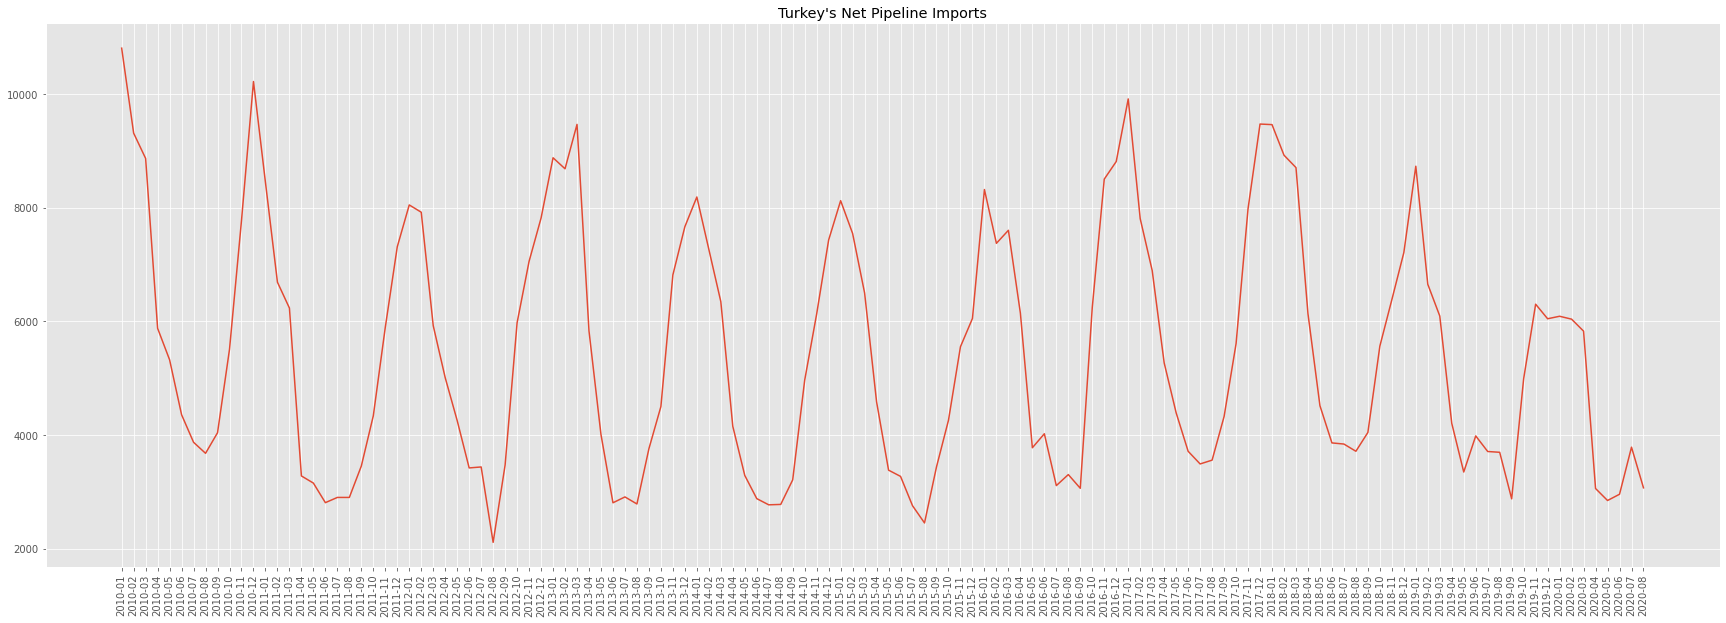

In [33]:
# we can also calculate Demand-LNG import = Pipeline Imports

figure(figsize=(30,10))
xticks(rotation=90)
plot(tur_data_LNG.TIME_PERIOD,tur_data_demand.OBS_VALUE.values-tur_data_LNG.OBS_VALUE.values,label="Demand")
title("Turkey's Net Pipeline Imports")

In [12]:
# load libraries for seasonal decompose from Statsmodels package
from statsmodels.tsa.seasonal import seasonal_decompose
import pandas.util.testing as tm

In [16]:
# Now we can decompose your data to seasonal components

# now you can decompose your data into trend, seasonal and residual parts

result = seasonal_decompose(tur_data_demand.OBS_VALUE, model='additive',freq=12)

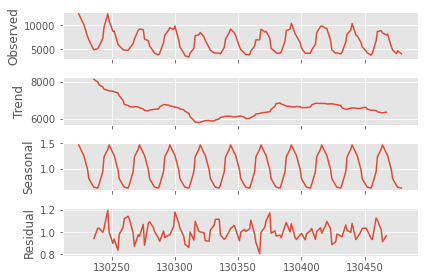

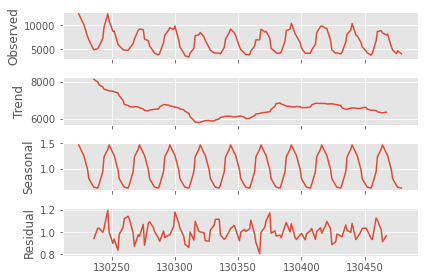

In [34]:
result.plot()

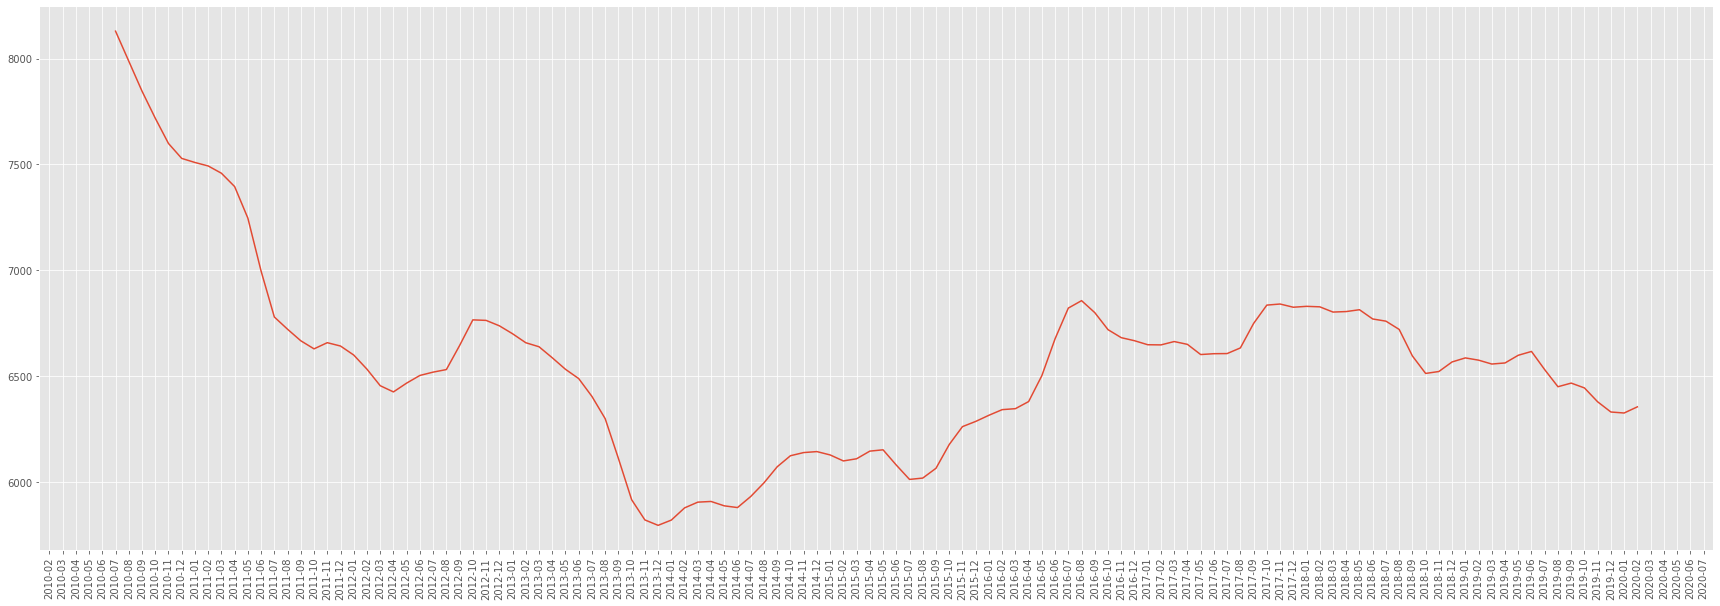

In [30]:
# again let's make it bigger

figure(figsize=(30,10))
xticks(rotation=90)

plot(tur_data_demand.TIME_PERIOD, result.trend);

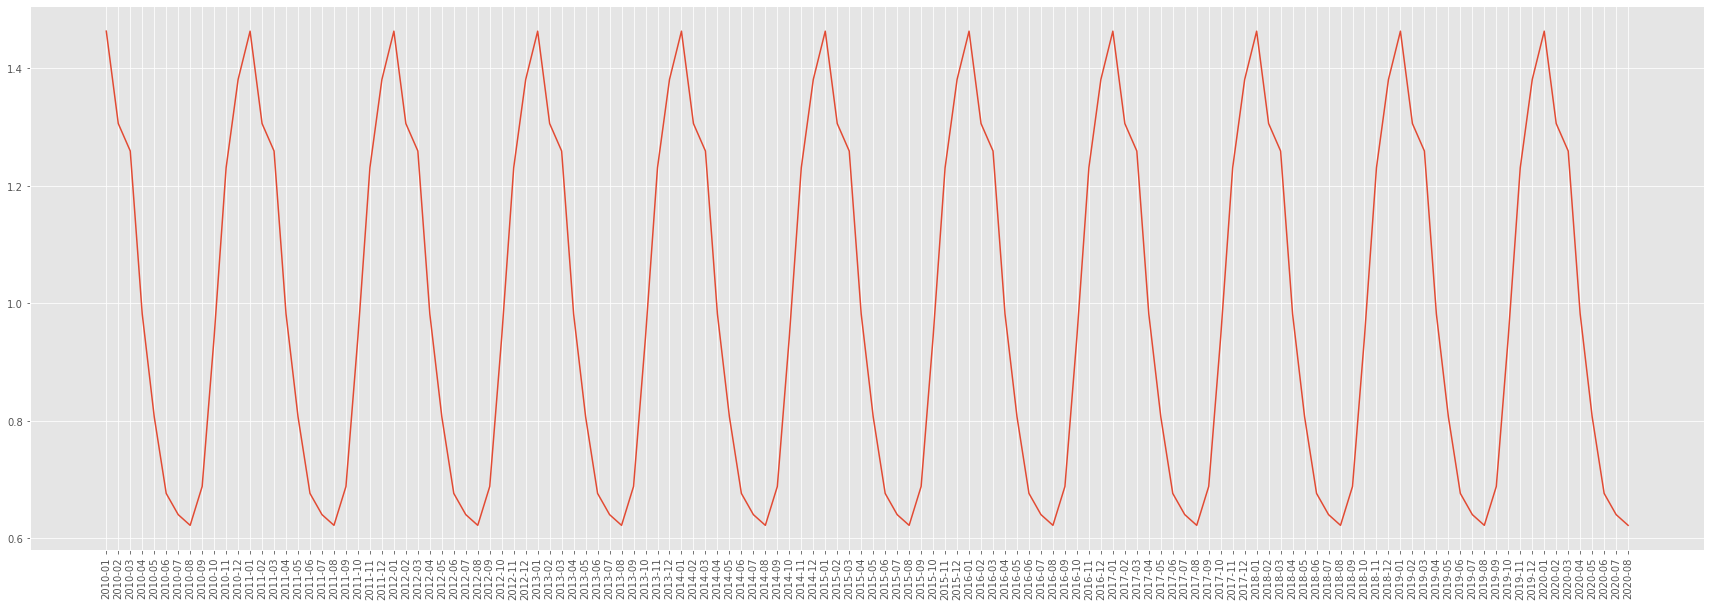

In [35]:
# and plot the seasonal component

figure(figsize=(30,10))
xticks(rotation=90)

plot(tur_data_demand.TIME_PERIOD, result.seasonal);


# Other countries

There are bunch of other countries contributing to JODI database. Their 2 letter codes can be found by

- df.REF_AREA.unique()  (*unique area codes*)

In [14]:
# country codes
# https://www.iso.org/obp/ui/#search/code/

df.REF_AREA.unique() 

array(['AE', 'AL', 'AM', 'AO', 'AR', 'AT', 'AU', 'AZ', 'BB', 'BD', 'BE',
       'BG', 'BH', 'BN', 'BO', 'BR', 'BY', 'BZ', 'CA', 'CH', 'CL', 'CN',
       'CO', 'CZ', 'DE', 'DK', 'DO', 'DZ', 'EC', 'EE', 'EG', 'ES', 'FI',
       'FR', 'GA', 'GB', 'GE', 'GQ', 'GR', 'HK', 'HR', 'HU', 'ID', 'IE',
       'IN', 'IQ', 'IR', 'IT', 'JP', 'KR', 'KW', 'KZ', 'LT', 'LU', 'LV',
       'LY', 'MA', 'MD', 'MK', 'MM', 'MT', 'MX', 'MY', 'NG', 'NL', 'NO',
       'NZ', 'OM', 'PE', 'PG', 'PH', 'PL', 'PT', 'QA', 'RO', 'RU', 'SE',
       'SG', 'SI', 'SK', 'TH', 'TN', 'TR', 'TT', 'TW', 'UA', 'US', 'UY',
       'VE', 'VN', 'ZA'], dtype=object)

Text(0.5, 1.0, "GB's Net Pipeline Imports")

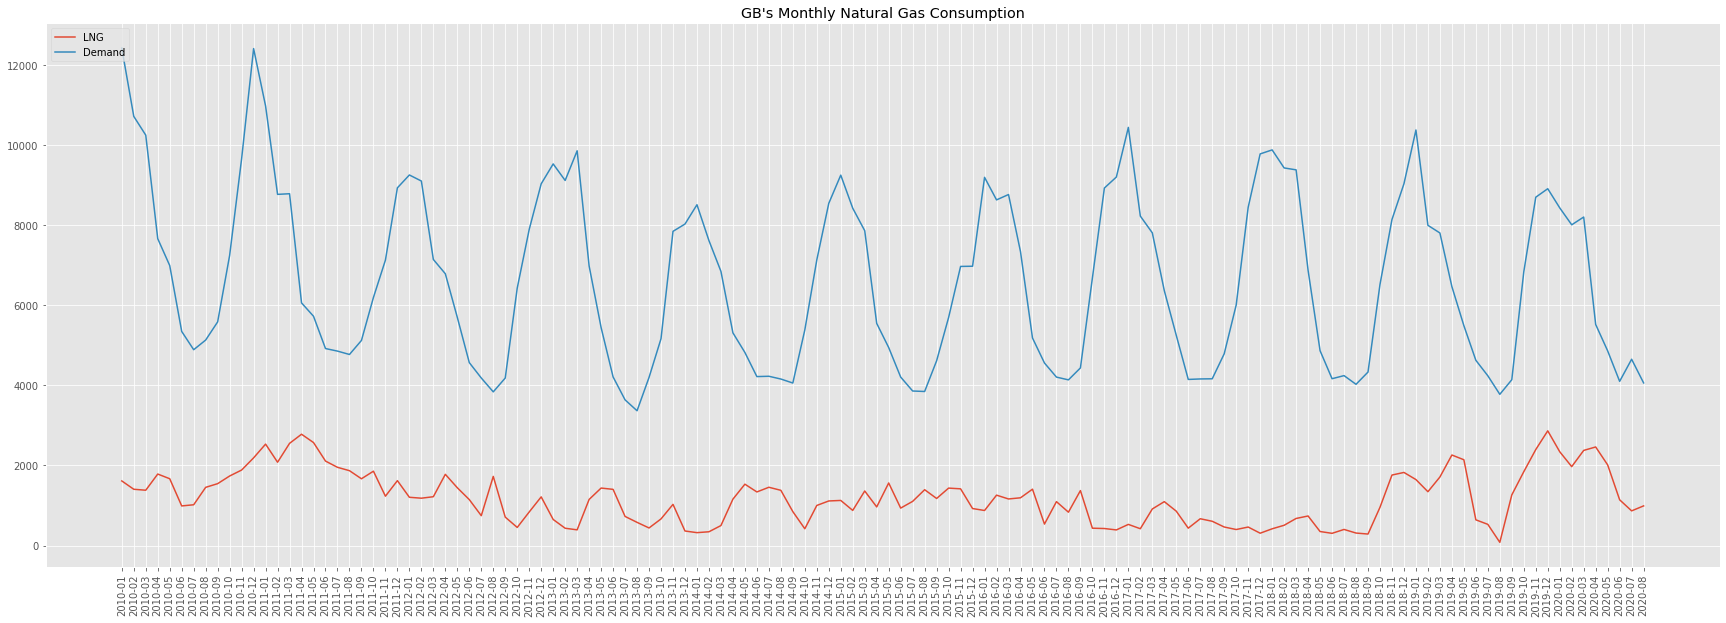

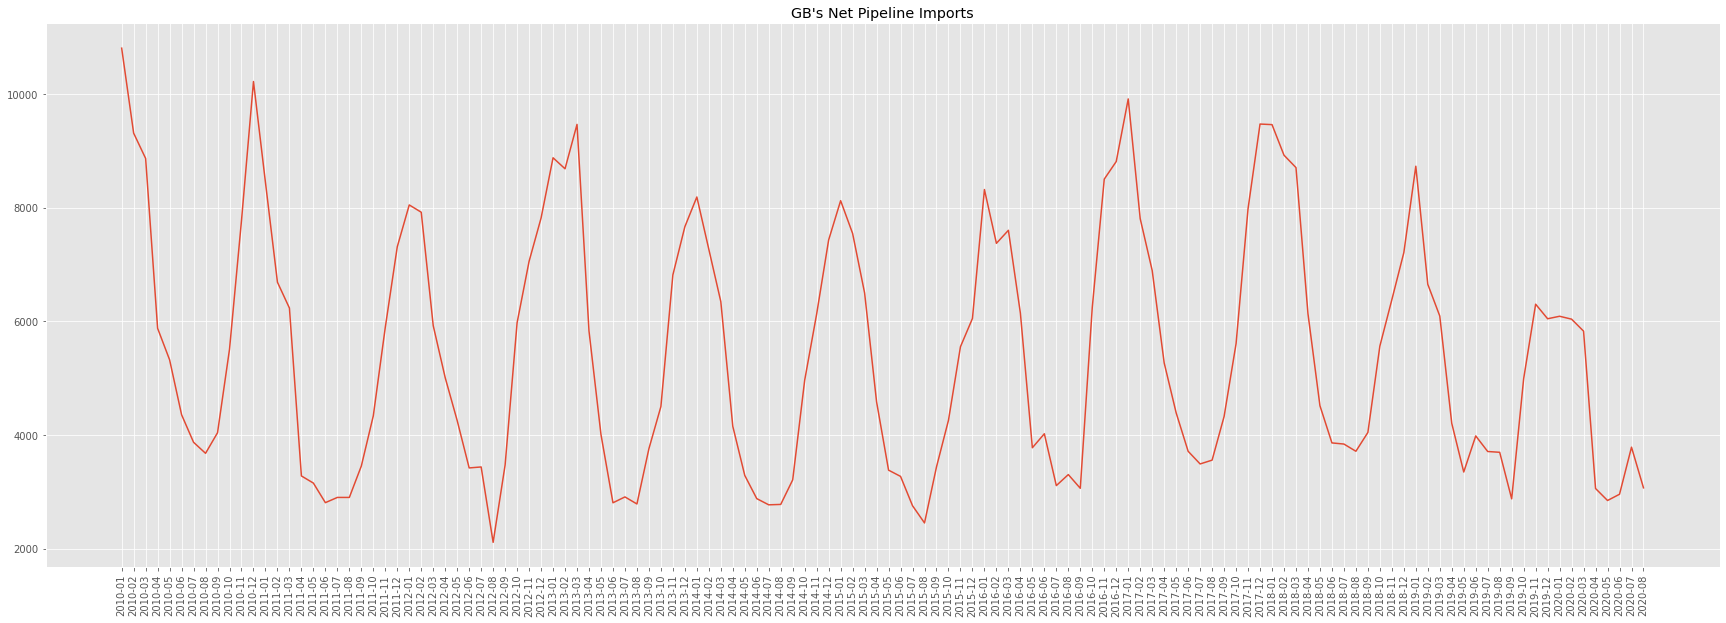

In [15]:
# change the country code and it will work
# REMEMBER, despite appearing here some countries do not publish data

country="GB"

tur_data_demand=df[(df.REF_AREA==country) & (df.UNIT_MEASURE=='M3') & (df.FLOW_BREAKDOWN=="TOTDEMO")]
tur_data_LNG=df[(df.REF_AREA==country) & (df.UNIT_MEASURE=='M3') & (df.FLOW_BREAKDOWN=="IMPLNG")]

plt.style.use('ggplot')
figure(figsize=(30,10))
xticks(rotation=90)
plot(tur_data_LNG.TIME_PERIOD,tur_data_LNG.OBS_VALUE,label="LNG")
plot(tur_data_demand.TIME_PERIOD,tur_data_demand.OBS_VALUE,label="Demand")
title(country+"'s Monthly Natural Gas Consumption")
legend(loc="upper left")

plt.style.use('ggplot')
figure(figsize=(30,10))
xticks(rotation=90)
plot(tur_data_LNG.TIME_PERIOD,tur_data_demand.OBS_VALUE.values-tur_data_LNG.OBS_VALUE.values,label="Demand")
title(country+"'s Net Pipeline Imports")